from MelPrp0628A1__crop_dark_edge
resize to 224

# start

In [1]:
PRFX = 'MelPrp0909A224'
PRFX_B4 = 'MelPrp0628A1'

In [2]:
SZ = 224

# setup

In [3]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

from PIL import Image

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')


In [4]:
p_cmp = '../input/siim-isic-melanoma-classification'
p_b4 = f'../output/{PRFX_B4}'
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)

In [5]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/train

In [6]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/test

In [7]:
mkdir -p $p_out/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input

# process csv

In [8]:
ls $p_b4

andrewmvd--isic-2019/               test.csv       train_all_original.csv
siim-isic-melanoma-classification/  train_all.csv


In [9]:
train_all0=pd.read_csv(f'{p_b4}/train_all.csv')
test0=pd.read_csv(f'{p_b4}/test.csv')

train_all=train_all0.copy()
test=test0.copy()

In [10]:
print(train_all0.shape)
train_all0.head()

(58457, 4)


,source,im_pth,patient_id,target
0,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0628A1/siim-isic-melanoma-clas...,IP_8723313,0.0


In [11]:
train_all.im_pth = train_all.im_pth.apply(lambda x: x.replace(PRFX_B4, PRFX))
train_all.head()

,source,im_pth,patient_id,target
0,20,../output/MelPrp0909A224/siim-isic-melanoma-cl...,IP_7279968,0.0
1,20,../output/MelPrp0909A224/siim-isic-melanoma-cl...,IP_3075186,0.0
2,20,../output/MelPrp0909A224/siim-isic-melanoma-cl...,IP_2842074,0.0
3,20,../output/MelPrp0909A224/siim-isic-melanoma-cl...,IP_6890425,0.0
4,20,../output/MelPrp0909A224/siim-isic-melanoma-cl...,IP_8723313,0.0


In [12]:
print(test0.shape)
test0.head()

(10982, 6)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0628A1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0628A1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0628A1/siim-isic-melanoma-clas...


In [13]:
test.im_pth = test.im_pth.apply(lambda x: x.replace(PRFX_B4, PRFX))
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0909A224/siim-isic-melanoma-cl...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0909A224/siim-isic-melanoma-cl...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0909A224/siim-isic-melanoma-cl...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0909A224/siim-isic-melanoma-cl...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0909A224/siim-isic-melanoma-cl...


In [14]:
train_all.to_csv(f'{p_out}/train_all.csv', index=False)
test.to_csv(f'{p_out}/test.csv', index=False)

## dedup

In [16]:
train_all_dedup = train_all.copy()

df_dup = pd.read_csv('../input/siim-isic-melanoma-classification/2020_Challenge_duplicates.csv')
df_dup_train = df_dup[df_dup.partition=='train']
for id_dup in df_dup_train.ISIC_id_paired:
    train_all_dedup = train_all_dedup[~train_all_dedup.im_pth.str.contains(id_dup)]
len(df_dup_train)+len(train_all_dedup), len(train_all)

(58457, 58457)

In [17]:
train_all_dedup.to_csv(f'{p_out}/train_all_dedup.csv', index=False)

# process image

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_6982423.jpg
(5766, 3999)


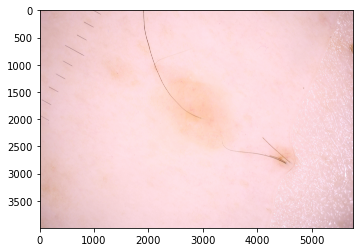

In [18]:
fnm = np.random.choice(train_all0.im_pth)
print(fnm)
im = Image.open(fnm)
print(im.size)
plt.imshow(im)
plt.show()

../output/MelPrp0909A224/siim-isic-melanoma-classification/jpeg/train/ISIC_6982423.jpg
(224, 224)


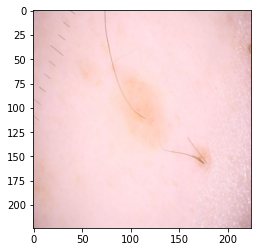

In [19]:
fnm_new = fnm.replace(PRFX_B4, PRFX)
print(fnm_new)
im_new = im.resize((SZ, SZ))
print(im_new.size)
plt.imshow(im_new)
plt.show()

In [20]:
def process(fnm):
    fnm_new = fnm.replace(PRFX_B4, PRFX)
    if os.path.exists(fnm_new): return
    im = Image.open(fnm)
    im_new = im.resize((SZ, SZ))
    im_new.save(fnm_new)

In [21]:
im_pths_2_process = list(train_all0.im_pth.values)+list(test0.im_pth.values)
len(im_pths_2_process)

69439

In [22]:
Parallel(n_jobs=8, verbose=10)(delayed(process)(fnm) for fnm in im_pths_2_process)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   11.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(

[Parallel(n_jobs=8)]: Done 9506 tasks      | elapsed: 14.0min
[Parallel(n_jobs=8)]: Done 9645 tasks      | elapsed: 14.2min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed: 14.4min
[Parallel(n_jobs=8)]: Done 9925 tasks      | elapsed: 14.6min
[Parallel(n_jobs=8)]: Done 10066 tasks      | elapsed: 14.8min
[Parallel(n_jobs=8)]: Done 10209 tasks      | elapsed: 15.0min
[Parallel(n_jobs=8)]: Done 10352 tasks      | elapsed: 15.2min
[Parallel(n_jobs=8)]: Done 10497 tasks      | elapsed: 15.4min
[Parallel(n_jobs=8)]: Done 10642 tasks      | elapsed: 15.6min
[Parallel(n_jobs=8)]: Done 10789 tasks      | elapsed: 15.8min
[Parallel(n_jobs=8)]: Done 10936 tasks      | elapsed: 16.0min
[Parallel(n_jobs=8)]: Done 11085 tasks      | elapsed: 16.2min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed: 16.4min
[Parallel(n_jobs=8)]: Done 11385 tasks      | elapsed: 16.6min
[Parallel(n_jobs=8)]: Done 11536 tasks      | elapsed: 16.8min
[Parallel(n_jobs=8)]: Done 11689 tasks      | elapsed: 17.0

[Parallel(n_jobs=8)]: Batch computation too fast (0.1996s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done 37892 tasks      | elapsed: 82.9min
[Parallel(n_jobs=8)]: Done 38960 tasks      | elapsed: 83.0min
[Parallel(n_jobs=8)]: Done 40036 tasks      | elapsed: 83.1min
[Parallel(n_jobs=8)]: Done 41112 tasks      | elapsed: 83.3min
[Parallel(n_jobs=8)]: Done 42196 tasks      | elapsed: 83.4min
[Parallel(n_jobs=8)]: Done 43280 tasks      | elapsed: 83.5min
[Parallel(n_jobs=8)]: Done 44372 tasks      | elapsed: 83.6min
[Parallel(n_jobs=8)]: Done 45464 tasks      | elapsed: 83.8min
[Parallel(n_jobs=8)]: Done 46564 tasks      | elapsed: 84.0min
[Parallel(n_jobs=8)]: Done 47664 tasks      | elapsed: 84.3min
[Parallel(n_jobs=8)]: Done 48772 tasks      | elapsed: 84.6min
[Parallel(n_jobs=8)]: Done 49880 tasks      | elapsed: 84.9min
[Parallel(n_jobs=8)]: Done 50996 tasks      | elapsed: 85.2min
[Parallel(n_jobs=8)]: Done 52112 tasks      | elapsed: 85.5min
[Parallel(n_jobs=8)]: Done 53236 tas

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# inspect results

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/test/ISIC_9648810.jpg


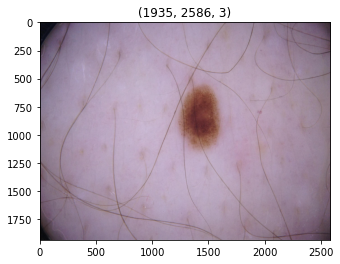

../output/MelPrp0909A224/siim-isic-melanoma-classification/jpeg/test/ISIC_9648810.jpg


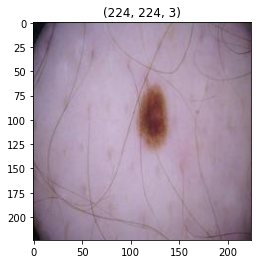

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_6977097.jpg


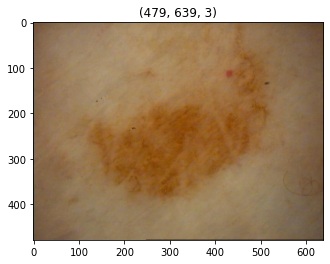

../output/MelPrp0909A224/siim-isic-melanoma-classification/jpeg/train/ISIC_6977097.jpg


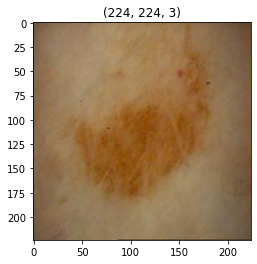

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_3854190.jpg


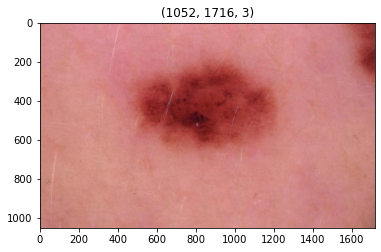

../output/MelPrp0909A224/siim-isic-melanoma-classification/jpeg/train/ISIC_3854190.jpg


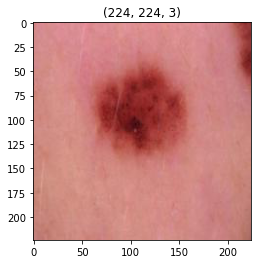

../output/MelPrp0628A1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0054697.jpg


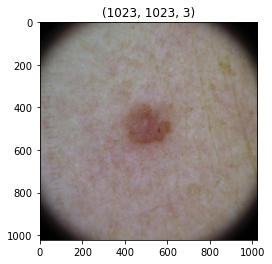

../output/MelPrp0909A224/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0054697.jpg


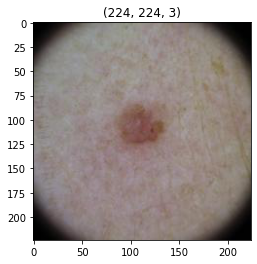

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_3314594.jpg


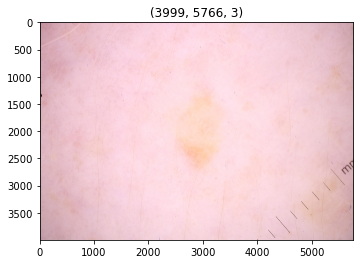

../output/MelPrp0909A224/siim-isic-melanoma-classification/jpeg/train/ISIC_3314594.jpg


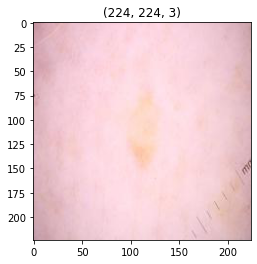

In [24]:
fnms = np.random.choice(im_pths_2_process, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()
    
    fnm_new = fnm.replace(PRFX_B4, PRFX)
    print(fnm_new)
    img = plt.imread(fnm_new)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()
    